In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Basic Operations

In [3]:
# Đọc file ảnh 
img = cv.imread('images/cards.jpg')
img.shape

(360, 840, 3)

In [5]:
# Đọc giá trị pixel tại hàng 100 và cột 155
# Giá trị trả về lần lượt ứng với kênh màu BGR
img[100, 155]

array([240, 240, 240], dtype=uint8)

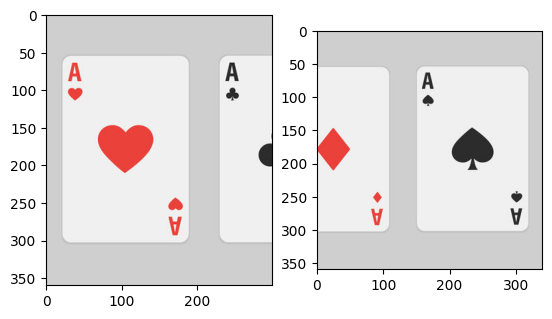

In [18]:
# Lấy ảnh bên trái ứng với 300 cột đầu tiên của ma trận
left = img[:, :300]
# Lấy ảnh bên phải ứng với từ cột thứ 500 tới cuối
right = img[:,500:]
# Lúc plot bằng pyplot cần chuyển thành kênh RGB
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(left, cv.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(right, cv.COLOR_BGR2RGB))

In [21]:
b, g, r = img[:,:,0], img[:,:,1], img[:,:,2] # tách thành 3 ma trận ứng với từng kênh màu
print(b.shape)
print(f"Blue channel = {b[175, 100]}")
print(f"Green channel = {g[175, 100]}")
print(f"Red channel = {r[175, 100]}")

(360, 840)
Blue channel = 58
Green channel = 65
Red channel = 234


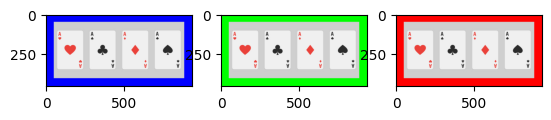

In [23]:
BLUE = [255, 0, 0]
GREEN = [0, 255, 0]
RED = [0, 0, 255]
blue_pad_img = cv.copyMakeBorder(img, 50, 50, 50, 50, cv.BORDER_CONSTANT, value=BLUE)
green_pad_img = cv.copyMakeBorder(img, 50, 50, 50, 50, cv.BORDER_CONSTANT, value=GREEN)
red_pad_img = cv.copyMakeBorder(img, 50, 50, 50, 50, cv.BORDER_CONSTANT, value=RED)
# plot các ảnh có vùng biên gán bằng giá trị hằng màu blue, green, red
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(blue_pad_img, cv.COLOR_BGR2RGB))
plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(green_pad_img, cv.COLOR_BGR2RGB))
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(red_pad_img, cv.COLOR_BGR2RGB))

## Arithmetic Operations

Blend hai ảnh cùng kích thước với nhau một cách tuyến tính

$$dst = \alpha \cdot img_1 + \beta \cdot img_2 + \gamma$$

Với ví dụ dưới, $\alpha=0.7$, $\beta=0.3$, $\gamma=0$

(300, 300, 3) (300, 300, 3)


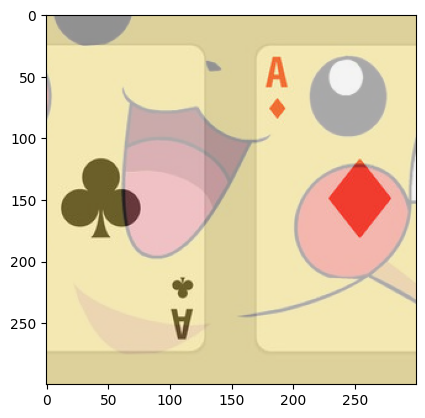

In [27]:
img1 = cv.imread("images/cards.jpg")[30:330, 270:570]
img2 = cv.imread("images/pikachu.jpg")[396:696, 218:518]
print(img1.shape, img2.shape)
dst = cv.addWeighted(img1, 0.7, img2, 0.3, 0)

plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

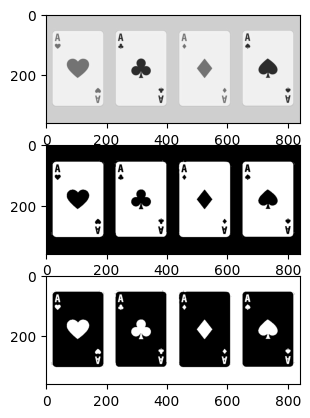

In [55]:
img2gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # convert ảnh BGR sang ảnh xám [0, 255]
ret, mask = cv.threshold(img2gray, 210, 255, cv.THRESH_BINARY) # chuyển những pixel có giá trị xám > 210 thì chuyển thành 255 (trắng), ngược lại thành 0)
not_mask = cv.bitwise_not(mask) # đảo các bit trong ma trận mask
plt.subplot(3, 1, 1)
plt.imshow(img2gray, cmap='gray', vmin=0, vmax=255)
plt.subplot(3, 1, 2)
plt.imshow(mask, cmap='gray', vmin=0, vmax=255)
plt.subplot(3, 1, 3)
plt.imshow(not_mask, cmap='gray', vmin=0, vmax=255)

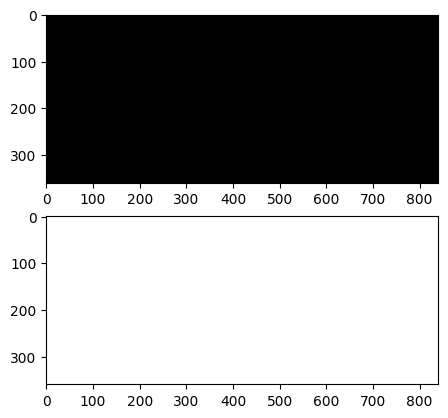

In [56]:
and_mask = cv.bitwise_and(mask, not_mask) # mask AND !mask = 0
xor_mask = cv.bitwise_xor(mask, not_mask) # mask XOR !mask = 11.111
plt.subplot(2, 1, 1)
plt.imshow(and_mask, cmap='gray', vmin=0, vmax=255)
plt.subplot(2, 1, 2)
plt.imshow(xor_mask, cmap='gray', vmin=0, vmax=255)

## Performance Measurement and Improvement Techniques

Đo thời gian thực hiện một đoạn chương trình bằng OpenCV

In [63]:
e1 = cv.getTickCount() # thời điểm bắt đầu

img2gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # convert ảnh BGR sang ảnh xám [0, 255]
ret, mask = cv.threshold(img2gray, 210, 255, cv.THRESH_BINARY) # chuyển những pixel có giá trị xám > 210 thì chuyển thành 255 (trắng), ngược lại thành 0)
not_mask = cv.bitwise_not(mask) # đảo các bit trong ma trận mask
mask = (mask / 255.0)**2
not_mask = (not_mask / 255.0)**2

e2 = cv.getTickCount() # thời điểm hoàn thành
time = (e2 - e1) / cv.getTickFrequency()
print(f"Time execution: {time:.6f}s")

Time execution: 0.007698s
